In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib notebook

<IPython.core.display.Javascript object>


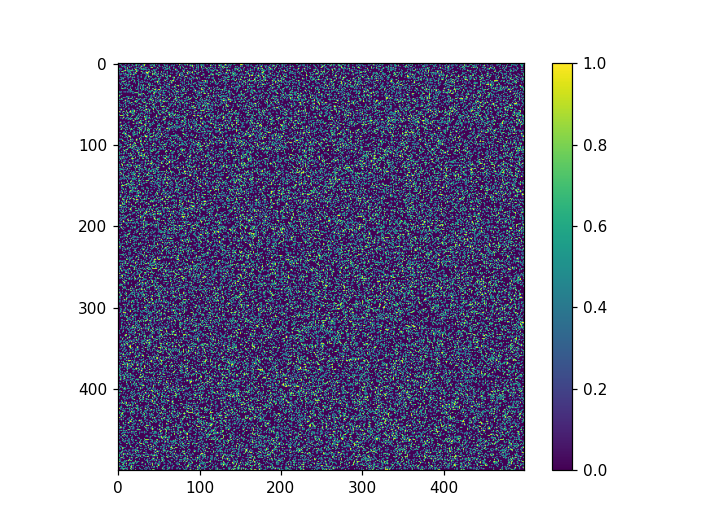

In [18]:
# %% User input
im = np.random.rand(500, 500, 500) > 0.8  # The image to be analyzed
fig1, ax1 = plt.subplots()
a = ax1.imshow(im[..., 50])
fig1.colorbar(a)

In [ ]:
# User specified ring properties
c = [240, 250]  # center
ri, ro = (100, 150)  # inner and outer radii
n = 50  # Number of angular bins to use

# %% The code
# Generate a ring
xx, yy = np.meshgrid(range(im.shape[0]), range(im.shape[1]))
d = np.sqrt((xx - c[0])**2 + (yy - c[1])**2)
ring = (d > ri) * (d < ro)

# Make it a 3D annulus
annulus = np.tile(np.atleast_3d(ring), [1, 1, im.shape[2]])

In [22]:
# Create theta field for thresholding below
q = np.rad2deg(np.arctan((yy - c[1])/(xx - c[0])))
q[xx < c[0]] = q[xx < c[0]] + 180
q += 90

/Users/j35/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/j35/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


<IPython.core.display.Javascript object>


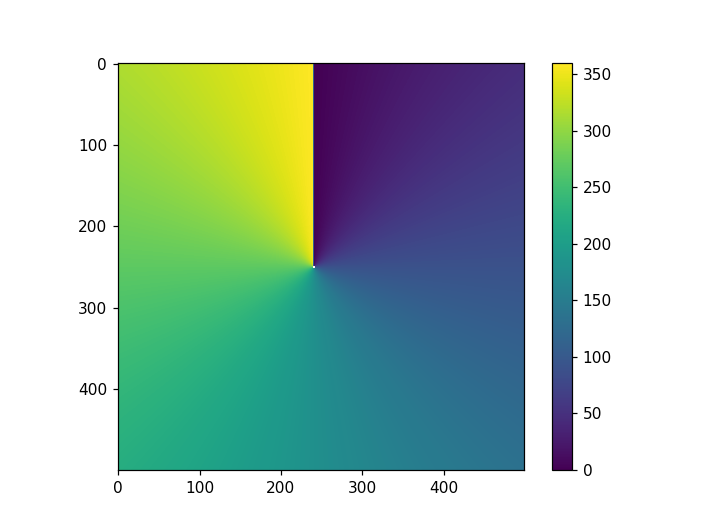

In [27]:
im = np.random.rand(500, 500, 500) > 0.8  # The image to be analyzed
fig3, ax3 = plt.subplots()
b = ax3.imshow(q)
fig3.colorbar(b)

/Users/j35/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/Users/j35/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
50it [00:05,  9.51it/s]


<IPython.core.display.Javascript object>


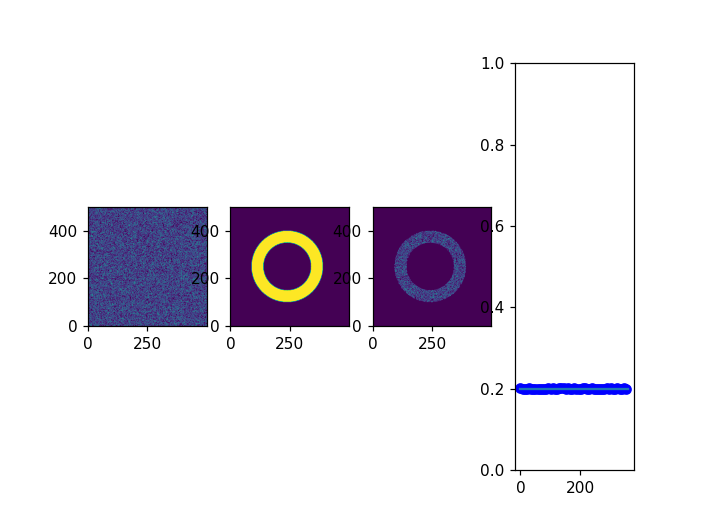

(0.0, 1.0)

In [5]:
# Scan image for specified number of angles
bins = np.linspace(0, 360, n, endpoint=False)
vals = np.zeros_like(bins)
data = im*annulus
w = 360/n
for i, a in tqdm(enumerate(bins)):
    mask = (q > a)*(q < (a+w))*annulus
    vals[i] = data[mask].sum()/data[mask].size

# %%  Do some plotting
fig, ax = plt.subplots(1, 4)
ax[0].imshow(im[..., 50], origin='lower')
ax[1].imshow(ring, origin='lower')
ax[2].imshow(data[..., 50], origin='lower')
ax[3].plot(bins, vals, 'b-o')
ax[3].plot([0, 360], [np.mean(vals)]*2)
plt.ylim([0, 1])